# Business understanding

De hoofdvraag van de opdrachtgever luidt: Hoe kan de Denver PD hun resources beter inzetten tijdens feestdagen?

Om het project wat te scopen hebben we de opdracht gekregen in eerste instantie te kijken naar de volgende feestdagen:

- Memorial day
- Independence day
- Thanksgiving
- Labor day

***
# Data understanding
Dit documentje is een basis voor de data understanding van de datasets die we hebben gekgregen voor de tweede challenge voor de Proof of Concept.


#### NOTE: De code hieronder zorgt dat de rest van het notebook werkt op zowel Mac als Windows

In [46]:
import platform
import os

# Get working directory
working_directory = os.getcwd()

# check if macos
isMac = "macos" in platform.platform().lower()

## Format
De data is aangeleverd in twee losse csv bestanden; crime.csv en offense_codes.csv. De bestanden zijn repectievelijk ±120 mb en ±35kb. 

NOTE: voeg de bestanden toe aan een mapje "data" onder de namen die hierboven staan.

In [47]:
# Variabele 
crime_file_path = (f"{working_directory}/data/crime.csv" if isMac else f"{working_directory}\\data\\crime.csv")
offense_file_path = f"{working_directory}/data/offense_codes.csv" if isMac else f"{working_directory}\\data\\offense_codes.csv"

## Data benaderen
De data kan worden benaderd met de paden die in bovenstaande cell staan. Dit doen we door ze in een Pandas Dataframe te stoppen, zoals hieronder. Hierna kun je in dit hele Jupyter Notebook gebruik maken van de dataframes.

In [48]:
import pandas as pd


# Data in een dataframe te stoppen
crime_df = pd.read_csv(crime_file_path)
offense_df = pd.read_csv(offense_file_path)

In [49]:
# importeren van visualisatie libraries
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from dateutil.relativedelta import relativedelta, MO
import numpy as np

## Data exploratie
Voor beide bestanden willen we eerst een globaal inzicht in de data. Hieronder gaan we ze een voor een bij langs.


### Crime.csv
Allereerst kijken we naar een csv bestand met daarin geregistreerde incidenten die zijn gebeurt in de stad Denver in Amerika.
Hieronder zie je hoeveel records er zijn (470278) en hoeveel kolommen (19). Ook zien we de (door pandas geïnterpreteerde) datatypes.

In [50]:

total_crime_count = len(crime_df.index)

In [51]:
# Kopie maken van de offense dataset voor later gebruik.
memorialday_offense_df = offense_df.copy()

# Hier maken wij van de datum kolommen pandas readable DateTime kolommen om hier later makkelijker mee te kunnen werken.
crime_df["FIRST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["FIRST_OCCURRENCE_DATE"])
crime_df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["LAST_OCCURRENCE_DATE"])
crime_df["REPORTED_DATE"] = pd.to_datetime(crime_df["REPORTED_DATE"])

# Hier maken wij een nieuwe kolom van de `Reported Date` zonder de tijdsnotatie.
crime_df["REPORTED_DATE_NORMALIZED"] = crime_df["REPORTED_DATE"].dt.normalize()
crime_df["YEAR"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.year


crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470278 entries, 0 to 470277
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   incident_id               470278 non-null  int64         
 1   offense_id                470278 non-null  int64         
 2   OFFENSE_CODE              470278 non-null  int64         
 3   OFFENSE_CODE_EXTENSION    470278 non-null  int64         
 4   OFFENSE_TYPE_ID           470278 non-null  object        
 5   OFFENSE_CATEGORY_ID       470278 non-null  object        
 6   FIRST_OCCURRENCE_DATE     470278 non-null  datetime64[ns]
 7   LAST_OCCURRENCE_DATE      174528 non-null  datetime64[ns]
 8   REPORTED_DATE             470278 non-null  datetime64[ns]
 9   INCIDENT_ADDRESS          432413 non-null  object        
 10  GEO_X                     466247 non-null  float64       
 11  GEO_Y                     466247 non-null  float64       
 12  GE

De kolommen betekenen het volgende:

| Variabele              | Betekenis                                                                      |
|------------------------|--------------------------------------------------------------------------------|
| incident_id            | De identifier van het indicent                                                 |
| offense_id             | De identifier van de illegale activiteit                                       |
| OFFENSE_CODE           | De code van de illegale activiteit                                             |
| OFFENSE_CODE_EXTENSION | De extensie op de code van de illegale activiteit                              |
| OFFENSE_TYPE_ID        | De type van de illegale activiteit                                             |
| OFFENSE_CATEGORY_ID    | De category van de illegale activiteit                                         |
| FIRST_OCCURRENCE_DATE  | De datum van de eerste voorval van de illegale activiteit                      |
| LAST_OCCURRENCE_DATE   | De datum van de laatste voorval van de illegale activiteit                     |
| REPORTED_DATE          | De datum wanneer het incident is gerapporteerd                                 |
| INCIDENT_ADDRESS       | Het adres waar het incident heeft plaats gevonden                              |
| GEO_X                  | GEO code op de X as van het incident                                           |
| GEO_Y                  | GEO code op de Y as van het incident                                           |
| GEO_LON                | GEO longitude van het incident                                                 |
| GEO_LAT                | GEO latitude van het incident                                                  |
| DISTRICT_ID            | De identifier van de staat/staten waar het indicent zich heeft plaats gevonden |
| PRECINCT_ID            | De identifier van de area waar het indicent zich heeft plaats gevonden         |
| NEIGHBORHOOD_ID        | De identifier van de buurt waar het indicent zich heeft plaats gevonden        |
| IS_CRIME               | Of het incident wel of geen misdaad is                                         |
| IS_TRAFFIC             | Of het incident wel of geen verkeersongeval is                                 |

Hieronder zie je een overzicht van een aantal beschrijvende statistieken van de dataset.

In [52]:
crime_df.describe()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,IS_CRIME,IS_TRAFFIC,YEAR
count,4.702780e+05,4.702780e+05,470278.000000,470278.000000,4.662470e+05,4.662470e+05,4.662460e+05,466246.000000,470277.000000,470277.000000,470278.000000,470278.000000,470278.000000
mean,4.585095e+09,4.585095e+15,3592.342408,0.209038,3.163137e+06,1.695337e+06,-1.049285e+02,39.721679,3.535121,371.170000,0.772800,0.227763,2019.091771
std,1.454714e+10,1.454714e+16,1624.156787,0.578655,6.431941e+05,2.183255e+05,1.793875e+00,0.679421,1.779745,178.910674,0.419023,0.419389,1.502276
min,2.019600e+04,2.019652e+10,902.000000,0.000000,1.000000e+00,1.000000e+00,-1.154641e+02,0.000000,1.000000,111.000000,0.000000,0.000000,2017.000000
25%,2.017705e+09,2.017705e+15,2305.000000,0.000000,3.139282e+06,1.683173e+06,-1.050048e+02,39.707754,2.000000,221.000000,1.000000,0.000000,2018.000000
50%,2.019399e+09,2.019399e+15,2999.000000,0.000000,3.146122e+06,1.694794e+06,-1.049804e+02,39.739852,3.000000,323.000000,1.000000,0.000000,2019.000000
75%,2.021280e+09,2.021280e+15,5441.000000,0.000000,3.164298e+06,1.702249e+06,-1.049162e+02,39.760192,5.000000,521.000000,1.000000,0.000000,2020.000000
max,2.020890e+12,2.020890e+18,7399.000000,5.000000,4.067477e+07,1.046707e+08,5.000000e-07,39.904311,7.000000,759.000000,1.000000,1.000000,2022.000000


Hieronder zie je hoe een regel van de dataset eruit ziet.

In [53]:
crime_df.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 12:00:00,2022-01-04 20:36:00,128 S CANOSA CT,...,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0,2022-01-04,2022
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 06:45:00,NaT,2022-01-03 11:01:00,650 15TH ST,...,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0,2022-01-03,2022
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 01:00:00,NaT,2022-01-03 06:11:00,919 E COLFAX AVE,...,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0,2022-01-03,2022
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,NaT,2022-01-03 21:12:00,2345 W ALAMEDA AVE,...,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0,2022-01-03,2022
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 17:06:00,NaT,2022-01-03 20:31:00,7800 E SMITH RD,...,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0,2022-01-03,2022


### Offense_codes.csv
Hieronder zie je een soortgelijk overzicht van de dataset met offense codes. Zoals je ziet zijn er 299 entries met 9 kolommen. Ook zien we de (door pandas geïnterpreteerde) datatypes. 

In [54]:
offense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   OBJECTID                299 non-null    int64 
 1   OFFENSE_CODE            299 non-null    int64 
 2   OFFENSE_CODE_EXTENSION  299 non-null    int64 
 3   OFFENSE_TYPE_ID         299 non-null    object
 4   OFFENSE_TYPE_NAME       299 non-null    object
 5   OFFENSE_CATEGORY_ID     299 non-null    object
 6   OFFENSE_CATEGORY_NAME   299 non-null    object
 7   IS_CRIME                299 non-null    int64 
 8   IS_TRAFFIC              299 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 21.1+ KB


De kolommen betekenen het volgende.

| Variabele              | Beschrijving                                  |
|------------------------|-----------------------------------------------|
| OBJECTID               | De identifier van de misdaad                  |
| OFFENSE_CODE           | De code van de misdaad                        |
| OFFENSE_CODE_EXTENSION | De extensie op de code van de misdaad         |
| OFFENSE_TYPE_ID        | De identifier van de type van de misdaad      |
| OFFENSE_TYPE_NAME      | De naam van de type van de misdaad            |
| OFFENSE_CATEGORY_ID    | De identifier van de categorie van de misdaad |
| OFFENSE_CATEGORY_NAME  | De naam van de categorie van de misdaad       |
| IS_CRIME               | Of de misdaad wel of geen misdaad is          |
| IS_TRAFFIC             | Of de misdaad wel of geen verkeersongeval is  |

Hieronder zie je een overzicht van een aantal beschrijvende statistieken van de dataset.

In [55]:
offense_df.describe()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,IS_CRIME,IS_TRAFFIC
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,150.000000,3368.886288,0.448161,0.979933,0.026756
std,86.458082,1784.546467,0.982987,0.140464,0.161640
min,1.000000,199.000000,0.000000,0.000000,0.000000
25%,75.500000,2100.000000,0.000000,1.000000,0.000000
50%,150.000000,2999.000000,0.000000,1.000000,0.000000
75%,224.500000,5015.500000,0.000000,1.000000,0.000000
max,299.000000,7399.000000,5.000000,1.000000,1.000000


Hieronder zie je hoe een regel van de dataset eruit ziet.

In [56]:
offense_df.head()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,1,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,3,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,4,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,5,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


Daarbij hebben we een overzicht van alle unieke offense types

In [57]:
offense_types = offense_df["OFFENSE_TYPE_NAME"]
for type in offense_types:
    print(f"{type}")

Possession of stolen property
Possession of a financial device
Damaged business property
Criminal mischief to private property
Criminal mischief to public property
Criminal mischief - other
Criminal mischief to a motor vehicle
Criminal mischief - graffiti
Manufacture of a hallucinogenic drug
Selling a hallucinogenic drug
Possession of a hallucinogenic drug
Selling heroin
Possession of heroin
Selling opium or an opium derivative
Possession of opium or an opium derivative
Selling cocaine
Possession of cocaine
Selling a synthetic narcotic drug
Possession of a synthetic narcotic drug
Possession of drug paraphernalia
Selling marijuana
Possession of marijuana
Cultivation of marijuana
Manufacture of methampetamine
Selling methampetamine
Possession of methampetamine
Manufacture of a barbiturate
Selling a barbiturate
Possession of a barbiturate
Other dangerous drugs - PCS
Manufacture or sell other dangerous drugs
Fondling of an adult
Indecent exposure
Incest with an adult
Window Peeping
Failure

***
# Algemene data preparation


In [58]:
# Hier maken wij van de datum kolommen pandas readable DateTime kolommen om hier later makkelijker mee te kunnen werken.
crime_df["FIRST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["FIRST_OCCURRENCE_DATE"])
crime_df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["LAST_OCCURRENCE_DATE"])
crime_df["REPORTED_DATE"] = pd.to_datetime(crime_df["REPORTED_DATE"])

# Hier maken wij een nieuwe kolom van de `Reported Date` zonder de tijdsnotatie.
crime_df["REPORTED_DATE_NORMALIZED"] = crime_df["REPORTED_DATE"].dt.normalize()
crime_df["YEAR"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.year

***
# Job story 1: Denver PD Feestdagen

Deze notebook geeft een overzicht van alle inzichten die zijn vergaard gedurende de eerste sprint van de tweede challenge.

## Business Understanding

Vraag van de opdrachtgever: Hoe kunnen wij onze manschappen het best verdelen op feestdagen?

## Casus

Denver PD, het politiedepartement in de Amerikaanse stad Denver wil inzicht krijgen in hoe zij het beste hun manschappen kunnen inzetten op feestdagen. Het gaat hen dan met name om de volgende feestdagen: Memorial day, Independence Day, Thanksgiving en Labour Day.

## Project Plan

Het is lastig om in één keer de primaire businessvraag te beantwoorden omdat niet meteen bekend is hoe Denver PD zijn manschappen indeelt. Echter hebben we in overleg de volgende deelvragen opgesteld.

Hoe verhoud het gemiddeld aantal incidenten op [feestdag] zich tot een gemiddelde dag?
Hoe verhoud de verdeling van wijken waarin incidenten gebeuren zicht tussen [feestdag] en het gemiddelde?
Hoe verhoud de verdeling van type incident zich tussen [feestdag] en het gemiddelde?
Zoals je ziet staat er in de deelvragen "[feestdag]". Dit komt omdat we voor elke feestdag de vraag gaan beantwoorden.

## Data Understanding

Zie algemene data omschrijving

## Job stories
Om deze deelvragen te beantwoorden hebben we ze omgevormd tot Job Stories

## Job story 1: Feestdagen

### Job story 1.1: Feestdagen overzicht

In [59]:
# Eerst maken we een genormaliseerde datum kolom aan.
# Hierdoor hebben we de datum zonder specifieke tijd, zo kunnen we per dag kijken naar de incidenten.
crime_df["REPORTED_DATE"] = pd.to_datetime(crime_df["REPORTED_DATE"])
crime_df["REPORTED_DATE_NORMALIZED"] = crime_df["REPORTED_DATE"].dt.normalize()

# hier pakken we alle data (hardcoded for now)
memorial_days = ["2017-05-29", "2018-05-28", "2019-05-27", "2020-05-25", "2021-05-31"]
independence_days = [
    "2017-07-04",
    "2018-07-04",
    "2019-07-04",
    "2020-07-04",
    "2021-07-04",
]
labour_days = ["2017-09-04", "2018-09-03", "2019-09-02", "2020-09-07", "2021-09-06"]
thanksgiving_days = [
    "2017-11-23",
    "2018-11-22",
    "2019-11-28",
    "2020-11-26",
    "2021-11-25",
]

# Hier maken we per feestdag een dataframe met de data
memorial_days_df = pd.DataFrame()
memorial_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(memorial_days)
memorial_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(
    memorial_days_df["REPORTED_DATE_NORMALIZED"]
).dt.normalize()

independence_days_df = pd.DataFrame()
independence_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(independence_days)
independence_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(
    independence_days_df["REPORTED_DATE_NORMALIZED"]
).dt.normalize()

labour_days_df = pd.DataFrame()
labour_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(labour_days)
labour_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(
    labour_days_df["REPORTED_DATE_NORMALIZED"]
).dt.normalize()

thanksgiving_days_df = pd.DataFrame()
thanksgiving_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(thanksgiving_days)
thanksgiving_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(
    thanksgiving_days_df["REPORTED_DATE_NORMALIZED"]
).dt.normalize()

In [60]:
memday_crime = crime_df.copy()
indday_crime = crime_df.copy()
labday_crime = crime_df.copy()
thaday_crime = crime_df.copy()

memday_crime = pd.merge(memday_crime, memorial_days_df, on="REPORTED_DATE_NORMALIZED")
indday_crime = pd.merge(
    indday_crime, independence_days_df, on="REPORTED_DATE_NORMALIZED"
)
labday_crime = pd.merge(labday_crime, labour_days_df, on="REPORTED_DATE_NORMALIZED")
thaday_crime = pd.merge(
    thaday_crime, thanksgiving_days_df, on="REPORTED_DATE_NORMALIZED"
)

In [61]:
j1_memday_crime = memday_crime.copy()
j1_indday_crime = indday_crime.copy()
j1_labday_crime = labday_crime.copy()
j1_thaday_crime = thaday_crime.copy()


# Tel alle incidenten op per datum van de Memorial days. Daarna voeg je de jaar toe als een kolom samen met de type.
j1_memday_count = j1_memday_crime.groupby(
    "REPORTED_DATE_NORMALIZED", as_index=False
).size()
j1_memday_count["YEAR"] = j1_memday_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_memday_count["TYPE"] = "Memorial Day"

j1_indday_count = j1_indday_crime.groupby(
    "REPORTED_DATE_NORMALIZED", as_index=False
).size()
j1_indday_count["YEAR"] = j1_indday_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_indday_count["TYPE"] = "Independence Day"

j1_labday_count = j1_labday_crime.groupby(
    "REPORTED_DATE_NORMALIZED", as_index=False
).size()
j1_labday_count["YEAR"] = j1_labday_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_labday_count["TYPE"] = "Labour Day"

j1_thaday_count = j1_thaday_crime.groupby(
    "REPORTED_DATE_NORMALIZED", as_index=False
).size()
j1_thaday_count["YEAR"] = j1_thaday_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_thaday_count["TYPE"] = "Thanksgiving"

j1_total_count = crime_df.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_total_count.index = j1_total_count["REPORTED_DATE_NORMALIZED"]

j1_crime_mean = j1_total_count.groupby(pd.Grouper(freq="Y")).mean()
j1_crime_mean = j1_crime_mean.reset_index()
j1_crime_mean["size"] = j1_crime_mean["size"].round(0)
j1_crime_mean["YEAR"] = j1_crime_mean["REPORTED_DATE_NORMALIZED"].dt.year

j1_crime_mean["TYPE"] = "Gemiddeld"
j1_crime_mean

j1_total_mean = pd.concat(
    [j1_memday_count, j1_indday_count, j1_labday_count, j1_thaday_count, j1_crime_mean]
)

j1_total_mean = j1_total_mean[j1_total_mean.YEAR != 2022]
j1_total_mean

,REPORTED_DATE_NORMALIZED,size,YEAR,TYPE
0,2017-05-29,256.0,2017,Memorial Day
1,2018-05-28,221.0,2018,Memorial Day
2,2019-05-27,221.0,2019,Memorial Day
3,2020-05-25,171.0,2020,Memorial Day
4,2021-05-31,236.0,2021,Memorial Day
0,2017-07-04,215.0,2017,Independence Day
1,2018-07-04,225.0,2018,Independence Day
2,2019-07-04,191.0,2019,Independence Day
3,2020-07-04,202.0,2020,Independence Day
4,2021-07-04,216.0,2021,Independence Day


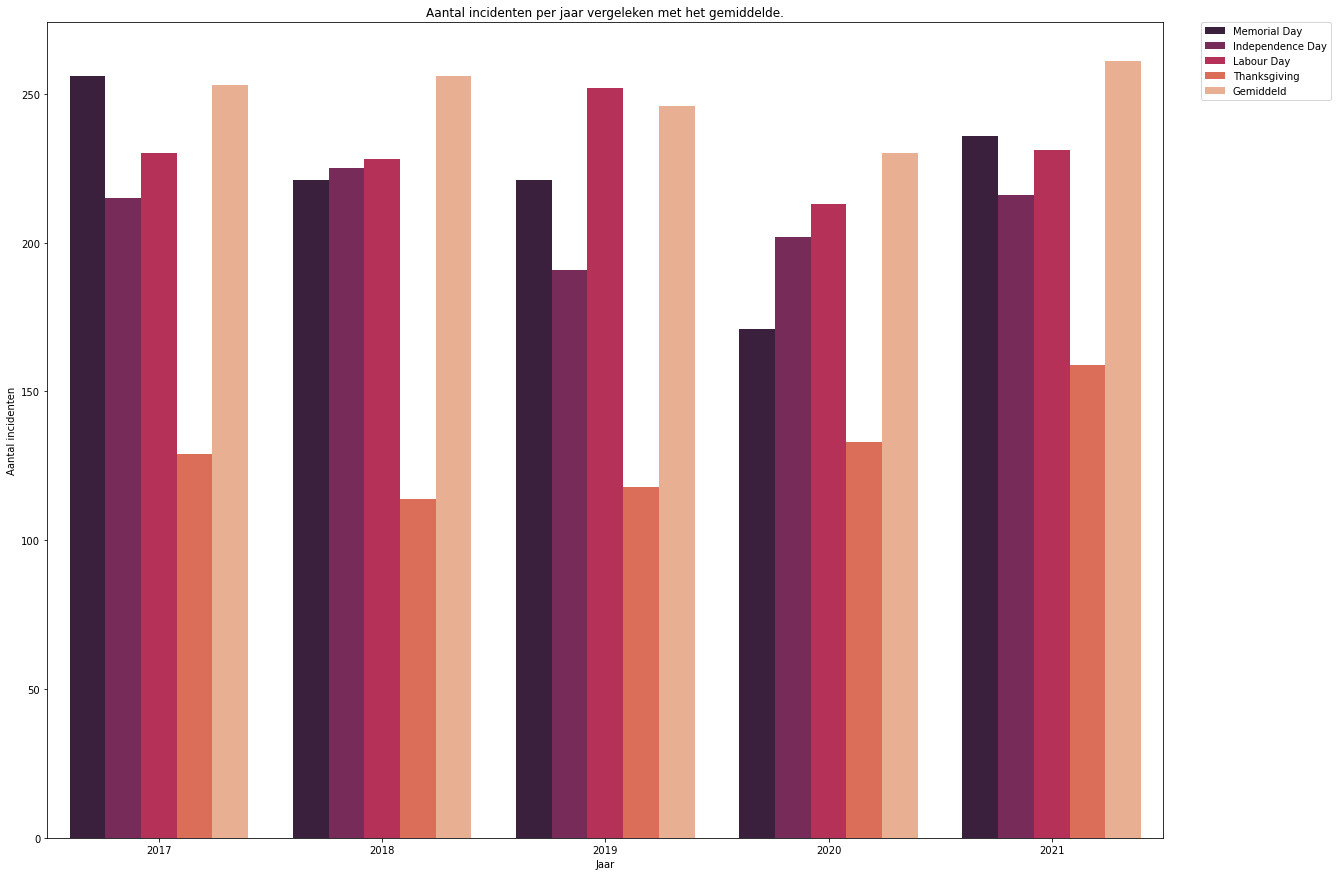

In [62]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(
    ax=ax, data=j1_total_mean, x="YEAR", y="size", hue="TYPE", palette="rocket"
)
ax.set(xlabel="Jaar", ylabel="Aantal incidenten")
ax.set(title="Aantal incidenten per jaar vergeleken met het gemiddelde.")

plt.legend(bbox_to_anchor=(1.15, 1), loc="upper right", borderaxespad=0)
plt.show()

### Job story 1.2: 

In [63]:
j2_memday_crime = memday_crime.copy()
j2_indday_crime = indday_crime.copy()
j2_labday_crime = labday_crime.copy()
j2_thaday_crime = thaday_crime.copy()


# Tel alle incidenten op per datum van de Memorial days. Daarna voeg je de jaar toe als een kolom samen met de type.
j2_memday_cat_count = j2_memday_crime.groupby(
    "OFFENSE_CATEGORY_ID", as_index=False
).size()
j2_memday_cat_count["TYPE"] = "Memorial Day"
memday_sum = j2_memday_cat_count["size"].sum()
j2_memday_cat_count["percentage"] = j2_memday_cat_count["size"] / memday_sum * 100
j2_memday_cat_count["percentage"] = j2_memday_cat_count["percentage"].round(2)

j2_indday_cat_count = j2_indday_crime.groupby(
    "OFFENSE_CATEGORY_ID", as_index=False
).size()
j2_indday_cat_count["TYPE"] = "Independence Day"
indday_sum = j2_indday_cat_count["size"].sum()
j2_indday_cat_count["percentage"] = j2_indday_cat_count["size"] / indday_sum * 100
j2_indday_cat_count["percentage"] = j2_indday_cat_count["percentage"].round(2)


j2_labday_cat_count = j2_labday_crime.groupby(
    "OFFENSE_CATEGORY_ID", as_index=False
).size()
j2_labday_cat_count["TYPE"] = "Labour Day"
labday_sum = j2_labday_cat_count["size"].sum()
j2_labday_cat_count["percentage"] = j2_labday_cat_count["size"] / labday_sum * 100
j2_labday_cat_count["percentage"] = j2_labday_cat_count["percentage"].round(2)

j2_thaday_cat_count = j2_thaday_crime.groupby(
    "OFFENSE_CATEGORY_ID", as_index=False
).size()
j2_thaday_cat_count["TYPE"] = "Thanksgiving"
thaday_sum = j2_thaday_cat_count["size"].sum()
j2_thaday_cat_count["percentage"] = j2_thaday_cat_count["size"] / thaday_sum * 100
j2_thaday_cat_count["percentage"] = j2_thaday_cat_count["percentage"].round(2)

j2_total_count = crime_df.groupby("OFFENSE_CATEGORY_ID", as_index=False).size()
j2_total_count["TYPE"] = "all"
j2_total_count["percentage"] = j2_total_count["size"] / total_crime_count * 100
j2_total_count["percentage"] = j2_total_count["percentage"].round(2)


j2_final = pd.concat(
    [
        j2_total_count,
        j2_thaday_cat_count,
        j2_memday_cat_count,
        j2_labday_cat_count,
        j2_indday_cat_count,
    ]
)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(j2_final)

             OFFENSE_CATEGORY_ID    size              TYPE  percentage
0             aggravated-assault   13652               all        2.90
1               all-other-crimes   74413               all       15.82
2                          arson     720               all        0.15
3                     auto-theft   39854               all        8.47
4                       burglary   24244               all        5.16
5                   drug-alcohol   22630               all        4.81
6                        larceny   49587               all       10.54
7                         murder     381               all        0.08
8   other-crimes-against-persons   21996               all        4.68
9                public-disorder   49619               all       10.55
10                       robbery    6327               all        1.35
11                sexual-assault    4031               all        0.86
12      theft-from-motor-vehicle   49760               all       10.58
13    

In [64]:
is_traffic = j2_final["OFFENSE_CATEGORY_ID"] == "traffic-accident"
traffic_df = j2_final[is_traffic]
traffic_df

,OFFENSE_CATEGORY_ID,size,TYPE,percentage
13,traffic-accident,106847,all,22.72
13,traffic-accident,148,Thanksgiving,22.66
12,traffic-accident,159,Memorial Day,14.39
13,traffic-accident,187,Labour Day,16.20
12,traffic-accident,179,Independence Day,17.06


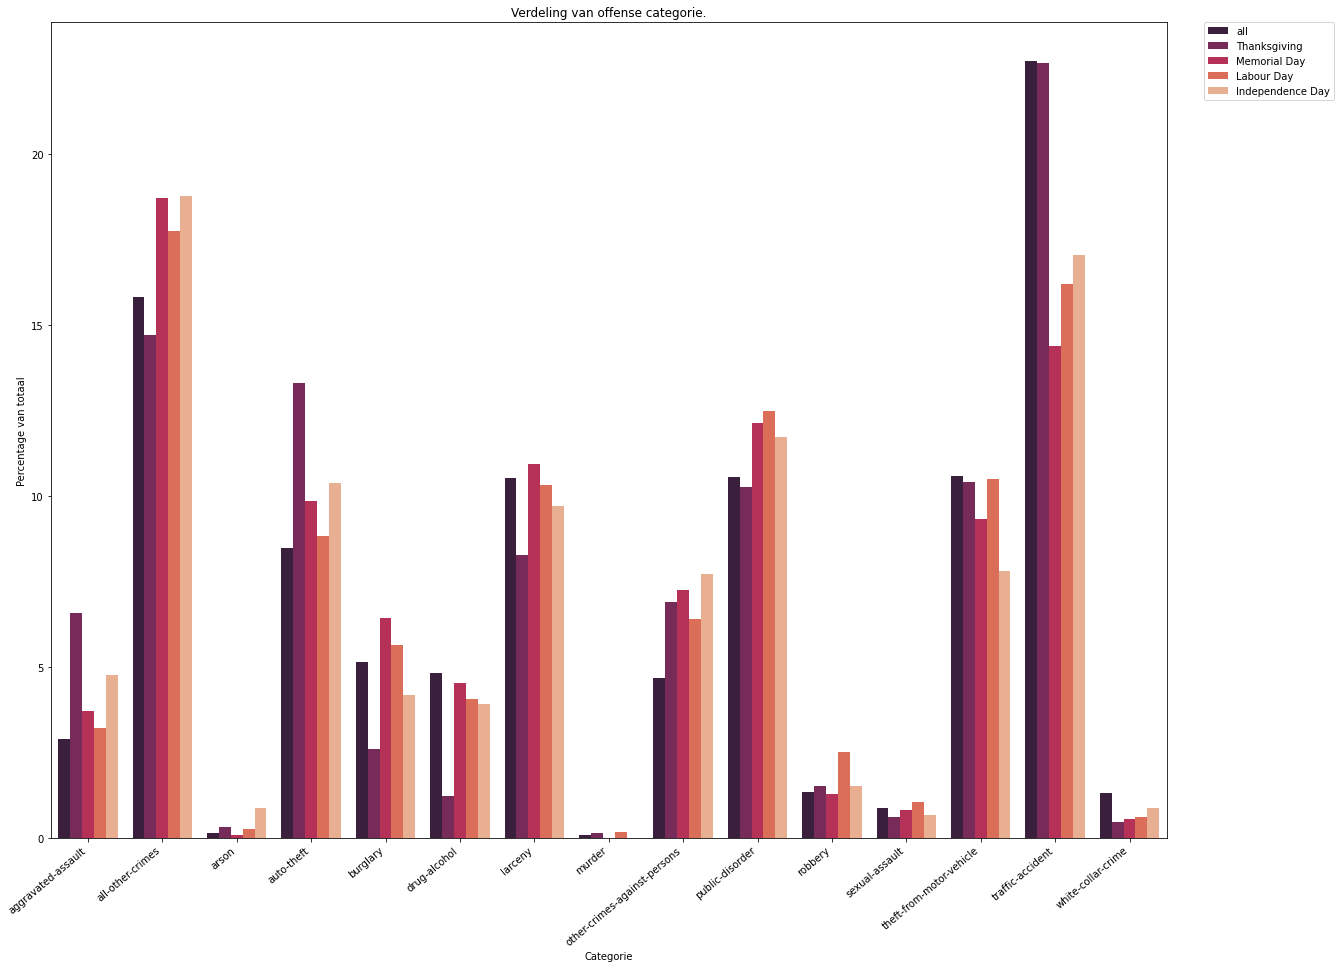

In [65]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(
    ax=ax,
    data=j2_final,
    x="OFFENSE_CATEGORY_ID",
    y="percentage",
    hue="TYPE",
    palette="rocket",
)
ax.set(xlabel="Categorie", ylabel="Percentage van totaal")
ax.set(title="Verdeling van offense categorie.")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.legend(bbox_to_anchor=(1.15, 1), loc="upper right", borderaxespad=0)
plt.show()

### Job story 1.3

In [66]:
j3_memday_crime = memday_crime.copy()
j3_indday_crime = indday_crime.copy()
j3_labday_crime = labday_crime.copy()
j3_thaday_crime = thaday_crime.copy()


# Tel alle incidenten op per datum van de Memorial days. Daarna voeg je de jaar toe als een kolom samen met de type.
j3_memday_nbh_count = j3_memday_crime.groupby("DISTRICT_ID", as_index=False).size()
j3_memday_nbh_count["TYPE"] = "Memorial Day"
memday_sum = j3_memday_nbh_count["size"].sum()
j3_memday_nbh_count["percentage"] = j3_memday_nbh_count["size"] / memday_sum * 100
j3_memday_nbh_count["percentage"] = j3_memday_nbh_count["percentage"].round(2)

j3_indday_nbh_count = j3_indday_crime.groupby("DISTRICT_ID", as_index=False).size()
j3_indday_nbh_count["TYPE"] = "Independence Day"
indday_sum = j3_indday_nbh_count["size"].sum()
j3_indday_nbh_count["percentage"] = j3_indday_nbh_count["size"] / indday_sum * 100
j3_indday_nbh_count["percentage"] = j3_indday_nbh_count["percentage"].round(2)


j3_labday_nbh_count = j3_labday_crime.groupby("DISTRICT_ID", as_index=False).size()
j3_labday_nbh_count["TYPE"] = "Labour Day"
labday_sum = j3_labday_nbh_count["size"].sum()
j3_labday_nbh_count["percentage"] = j3_labday_nbh_count["size"] / labday_sum * 100
j3_labday_nbh_count["percentage"] = j3_labday_nbh_count["percentage"].round(2)

j3_thaday_nbh_count = j3_thaday_crime.groupby("DISTRICT_ID", as_index=False).size()
j3_thaday_nbh_count["TYPE"] = "Thanksgiving"
thaday_sum = j3_thaday_nbh_count["size"].sum()
j3_thaday_nbh_count["percentage"] = j3_thaday_nbh_count["size"] / thaday_sum * 100
j3_thaday_nbh_count["percentage"] = j3_thaday_nbh_count["percentage"].round(2)

j3_total_count = crime_df.groupby("DISTRICT_ID", as_index=False).size()
j3_total_count["TYPE"] = "all"
j3_total_count["percentage"] = j3_total_count["size"] / total_crime_count * 100
j3_total_count["percentage"] = j3_total_count["percentage"].round(2)


j3_final = pd.concat(
    [
        j3_memday_nbh_count,
        j3_indday_nbh_count,
        j3_labday_nbh_count,
        j3_thaday_nbh_count,
        j3_total_count,
    ]
)
j3_final

,DISTRICT_ID,size,TYPE,percentage
0,1.0,167,Memorial Day,15.11
1,2.0,155,Memorial Day,14.03
2,3.0,237,Memorial Day,21.45
3,4.0,171,Memorial Day,15.48
4,5.0,119,Memorial Day,10.77
5,6.0,246,Memorial Day,22.26
6,7.0,10,Memorial Day,0.90
0,1.0,172,Independence Day,16.40
1,2.0,154,Independence Day,14.68
2,3.0,218,Independence Day,20.78


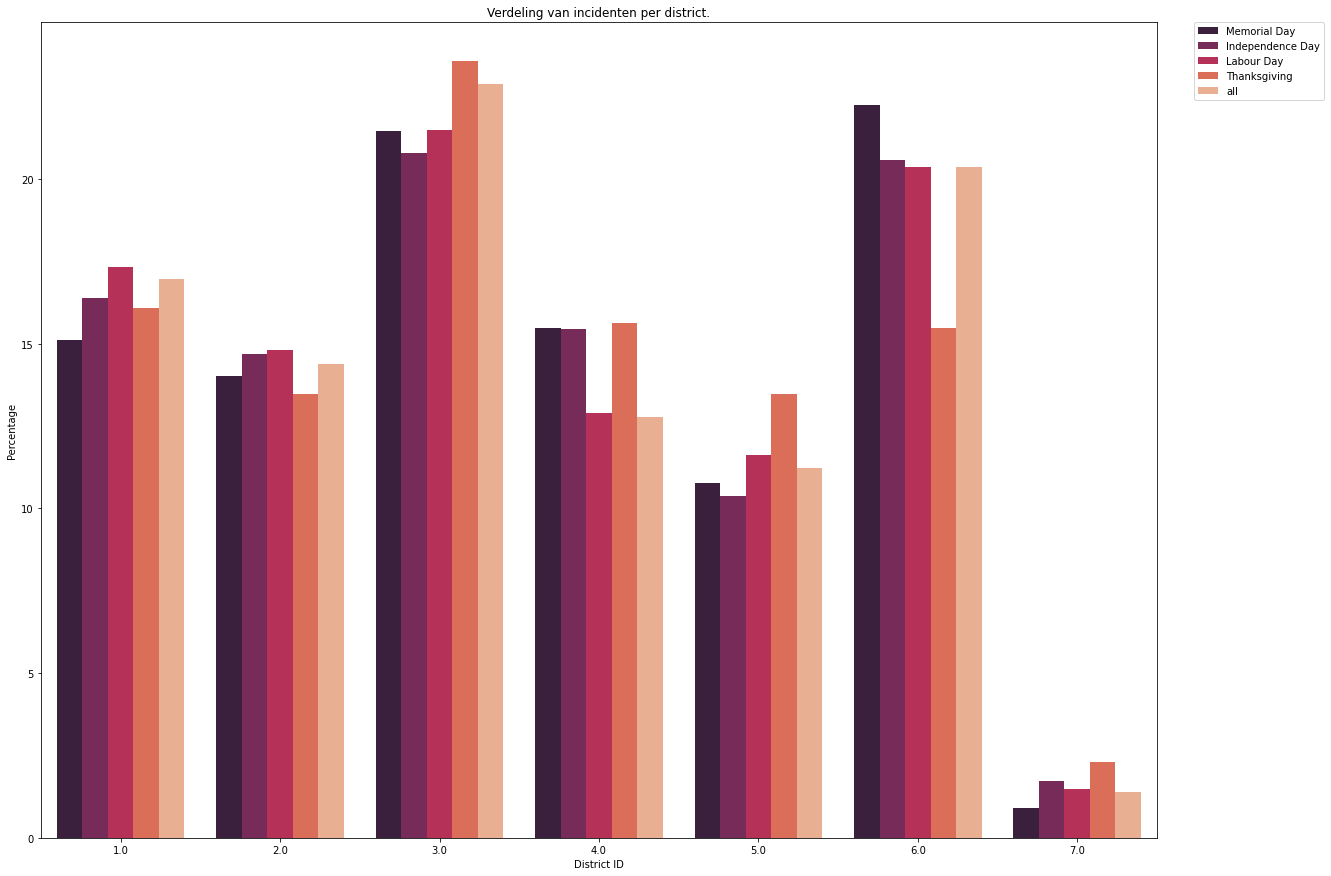

In [67]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(
    ax=ax, data=j3_final, x="DISTRICT_ID", y="percentage", hue="TYPE", palette="rocket"
)
ax.set(xlabel="District ID", ylabel="Percentage")
ax.set(title="Verdeling van incidenten per district.")

plt.legend(bbox_to_anchor=(1.15, 1), loc="upper right", borderaxespad=0)
plt.show()

## Job story 1.4: 

In [68]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
import os
from itertools import chain

In [69]:
thanksgiving_days = [
    "2017-11-23",
    "2018-11-22",
    "2019-11-28",
    "2020-11-26",
    "2021-11-25",
]

def get_weeks_of_date(date: str) -> list[str]:
    year, month, day = date.split("-")
    counter = -3
    weekdays: list[str] = []
    while counter <= 3:
        if counter == 0:
            counter +=1
            continue
        d = int(day) + counter
        m = int(month)
        if d > 30:
            d = 1
            m = m + 1

        weekdays.append(f"{year}-{m}-{d}")
        counter += 1 

    return weekdays

thanksgivin_week_dates = list(chain.from_iterable([get_weeks_of_date(d) for d in thanksgiving_days]))

thanksgivin_week_dates

['2017-11-20',
 '2017-11-21',
 '2017-11-22',
 '2017-11-24',
 '2017-11-25',
 '2017-11-26',
 '2018-11-19',
 '2018-11-20',
 '2018-11-21',
 '2018-11-23',
 '2018-11-24',
 '2018-11-25',
 '2019-11-25',
 '2019-11-26',
 '2019-11-27',
 '2019-11-29',
 '2019-11-30',
 '2019-12-1',
 '2020-11-23',
 '2020-11-24',
 '2020-11-25',
 '2020-11-27',
 '2020-11-28',
 '2020-11-29',
 '2021-11-22',
 '2021-11-23',
 '2021-11-24',
 '2021-11-26',
 '2021-11-27',
 '2021-11-28']

In [70]:
weekdays_df = pd.DataFrame()
weekdays_df["dates"] = thanksgivin_week_dates
weekdays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(weekdays_df["dates"])
weekdays_df["YEAR"] = weekdays_df["REPORTED_DATE_NORMALIZED"].dt.year
weekdays_df = weekdays_df.drop(labels="dates", axis=1)
weekdays_df["TYPE"] = "Thanksgiving week"

weekdays_df

thadays_df = pd.DataFrame()
thadays_df["dates"] = thanksgiving_days
thadays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(thadays_df["dates"])
thadays_df["YEAR"] = thadays_df["REPORTED_DATE_NORMALIZED"].dt.year
thadays_df = thadays_df.drop(labels="dates", axis=1)
thadays_df["TYPE"] = "Thanksgiving day"

thadays_df

,REPORTED_DATE_NORMALIZED,YEAR,TYPE
0,2017-11-23,2017,Thanksgiving day
1,2018-11-22,2018,Thanksgiving day
2,2019-11-28,2019,Thanksgiving day
3,2020-11-26,2020,Thanksgiving day
4,2021-11-25,2021,Thanksgiving day


In [71]:
is_traffic = crime_df["OFFENSE_CATEGORY_ID"] == "traffic-accident" 
traffic_df = crime_df[is_traffic]

# traffic_df["dates"] = pd.to_datetime(traffic_df["REPORTED_DATE"])
# traffic_df["REPORTED_DATE_NORMALIZED"] = traffic_df["dates"].dt.normalize()


weekdays = pd.merge(
    traffic_df, weekdays_df, on="REPORTED_DATE_NORMALIZED"
)
thadays = pd.merge(
    traffic_df, thadays_df, on="REPORTED_DATE_NORMALIZED"
)
weekdays

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR_x,YEAR_y,TYPE
0,2021670336,2021670336540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2021-11-27 15:32:00,NaT,2021-11-27 15:32:00,2300 BLK S KEARNEY ST,...,39.674211,3.0,323.0,goldsmith,0,1,2021-11-27,2021,2021,Thanksgiving week
1,2021670612,2021670612540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2021-11-27 18:52:00,NaT,2021-11-27 21:50:00,E EXPOSITION AVE / S MONACO ST,...,39.703860,3.0,322.0,washington-virginia-vale,0,1,2021-11-27,2021,2021,Thanksgiving week
2,2021670506,2021670506540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2021-11-27 17:36:00,NaT,2021-11-27 18:42:00,E 18TH AVE / PARK AVE,...,39.744835,6.0,621.0,north-capitol-hill,0,1,2021-11-27,2021,2021,Thanksgiving week
3,2021670752,2021670752540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2021-11-27 19:50:00,NaT,2021-11-27 20:32:00,1502 S COLORADO BLVD,...,39.689166,3.0,322.0,virginia-village,0,1,2021-11-27,2021,2021,Thanksgiving week
4,2021670827,2021670827540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2021-11-27 21:29:00,NaT,2021-11-27 21:29:00,I225 HWYSB / I225 HWYNB,...,39.633961,3.0,324.0,hampden-south,0,1,2021-11-27,2021,2021,Thanksgiving week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2017787753,2017787753544100,5441,0,traffic-accident,traffic-accident,2017-11-24 11:45:00,NaT,2017-11-24 12:29:00,S PLATTE RIVER DR / W MISSISSIPPI AVE,...,39.696661,4.0,422.0,ruby-hill,0,1,2017-11-24,2017,2017,Thanksgiving week
1460,2017787723,2017787723544100,5441,0,traffic-accident,traffic-accident,2017-11-24 11:31:00,NaT,2017-11-24 11:57:00,1900 BLK W 32ND AVE,...,39.762214,1.0,113.0,highland,0,1,2017-11-24,2017,2017,Thanksgiving week
1461,2017788047,2017788047544100,5441,0,traffic-accident,traffic-accident,2017-11-24 14:00:00,NaT,2017-11-24 15:16:00,E COLFAX AVE / PARK AVE,...,39.740011,6.0,622.0,cheesman-park,0,1,2017-11-24,2017,2017,Thanksgiving week
1462,2017787931,2017787931544100,5441,0,traffic-accident,traffic-accident,2017-11-24 13:38:00,NaT,2017-11-24 13:38:00,W CROSS DR / S ESTES ST,...,39.614522,4.0,423.0,marston,0,1,2017-11-24,2017,2017,Thanksgiving week


In [72]:
weekdays_total = pd.merge(
    crime_df, weekdays_df, on="REPORTED_DATE_NORMALIZED"
)

year_count_total = weekdays_total.groupby("YEAR_x", as_index=False).size()
year_count_total = year_count_total.rename({'YEAR_x': 'YEAR', 'size': 'TOTAL'}, axis=1)
year_count_total["TOTAL"] = year_count_total["TOTAL"] / 6
year_count_total["TOTAL"] = year_count_total["TOTAL"].round(0)

# totaal aantal crimes op dagen rond thanksgivingsday
year_count_total

,YEAR,TOTAL
0,2017,226.0
1,2018,228.0
2,2019,196.0
3,2020,221.0
4,2021,252.0


In [73]:
# weekdays

week_count = weekdays.groupby(
    "YEAR_x", as_index=False
).size()

week_count["size"] = week_count["size"] / 6
week_count["size"] = week_count["size"].round(0)

week_count["TYPE"] = "Gemiddelde van de week"

week_count["TOTAL"] = year_count_total["TOTAL"]

week_count["Percentage"] = week_count["size"] / week_count["TOTAL"]

## overzicht dagen week thagiving gemiddeld traffix acc + totaal gemiddeld per dag + percentage gemiddeld per dag
week_count

,YEAR_x,size,TYPE,TOTAL,Percentage
0,2017,53.0,Gemiddelde van de week,226.0,0.234513
1,2018,57.0,Gemiddelde van de week,228.0,0.250000
2,2019,55.0,Gemiddelde van de week,196.0,0.280612
3,2020,38.0,Gemiddelde van de week,221.0,0.171946
4,2021,41.0,Gemiddelde van de week,252.0,0.162698


In [74]:
thadays_total = pd.merge(
    crime_df, thadays_df, on="REPORTED_DATE_NORMALIZED"
)

year_count_days = thadays_total.groupby("YEAR_x", as_index=False).size()
year_count_days = year_count_days.rename({'YEAR_x': 'YEAR', 'size': 'TOTAL'}, axis=1)
year_count_days["TOTAL"] = year_count_days["TOTAL"].round(0)

# totaal aantal crimes op dagen rond thanksgivingsday
year_count_days

,YEAR,TOTAL
0,2017,129
1,2018,114
2,2019,118
3,2020,133
4,2021,159


In [75]:
thadays

thadays_count = thadays.groupby("YEAR_x", as_index=False).size()
thadays_count["TYPE"] = "Dag"
thadays_count["TOTAL"] = year_count_days["TOTAL"]

thadays_count["Percentage"] = thadays_count["size"] / thadays_count["TOTAL"]


thadays_count

,YEAR_x,size,TYPE,TOTAL,Percentage
0,2017,23,Dag,129,0.178295
1,2018,25,Dag,114,0.219298
2,2019,41,Dag,118,0.347458
3,2020,27,Dag,133,0.203008
4,2021,32,Dag,159,0.201258


In [76]:
total = pd.concat([thadays_count, week_count])
total

,YEAR_x,size,TYPE,TOTAL,Percentage
0,2017,23.0,Dag,129.0,0.178295
1,2018,25.0,Dag,114.0,0.219298
2,2019,41.0,Dag,118.0,0.347458
3,2020,27.0,Dag,133.0,0.203008
4,2021,32.0,Dag,159.0,0.201258
0,2017,53.0,Gemiddelde van de week,226.0,0.234513
1,2018,57.0,Gemiddelde van de week,228.0,0.250000
2,2019,55.0,Gemiddelde van de week,196.0,0.280612
3,2020,38.0,Gemiddelde van de week,221.0,0.171946
4,2021,41.0,Gemiddelde van de week,252.0,0.162698


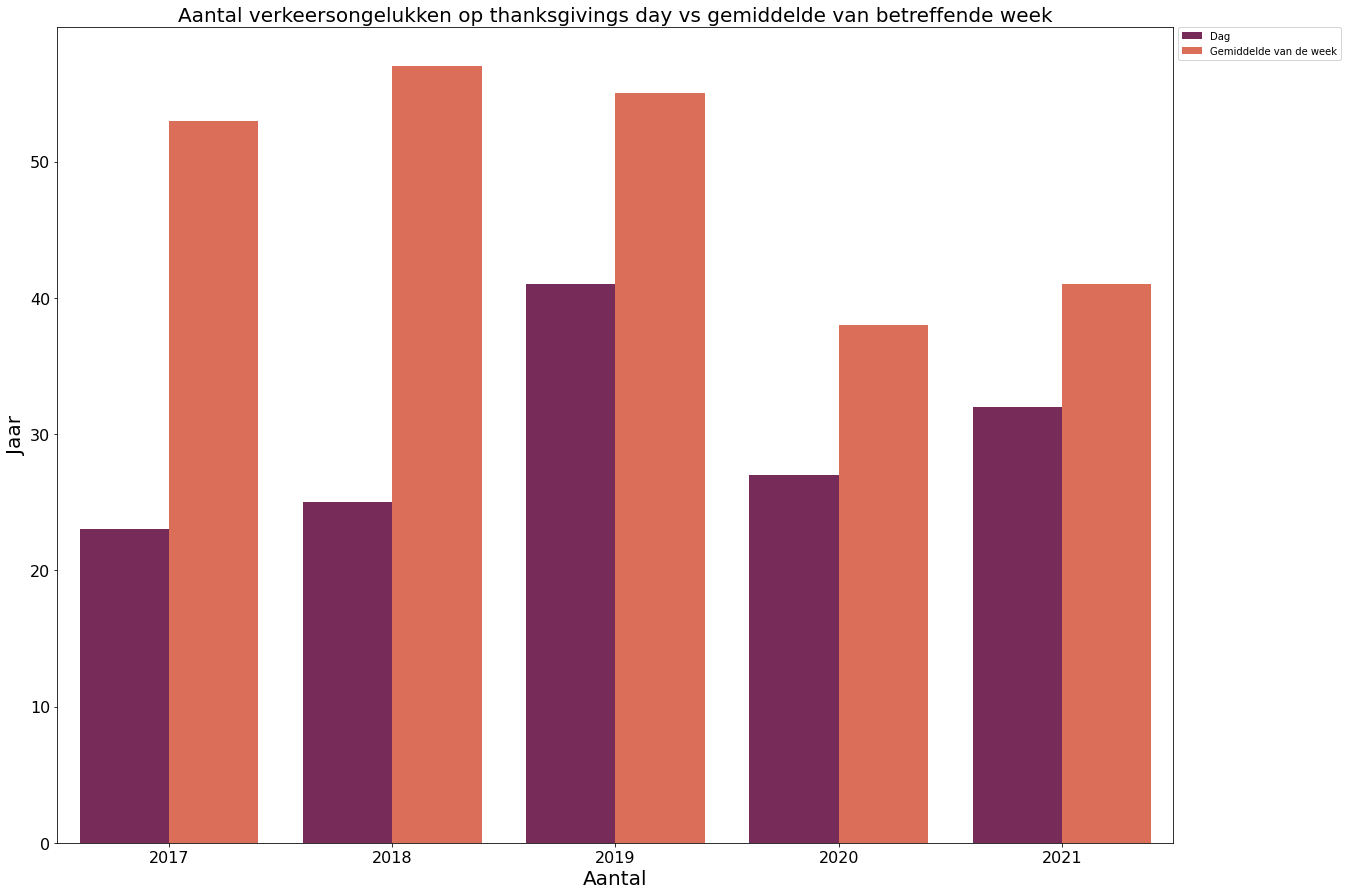

In [77]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(
    ax=ax,
    data=total,
    x="YEAR_x",
    y="size",
    hue="TYPE",
    palette="rocket",
)
ax.set(xlabel="Jaar", ylabel="Aantal")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Aantal verkeersongelukken op thanksgivings day vs gemiddelde van betreffende week", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Aantal", fontsize=20)
plt.ylabel("Jaar", fontsize=20)

plt.legend(bbox_to_anchor=(1.15, 1), loc="upper right", borderaxespad=0)
plt.show()

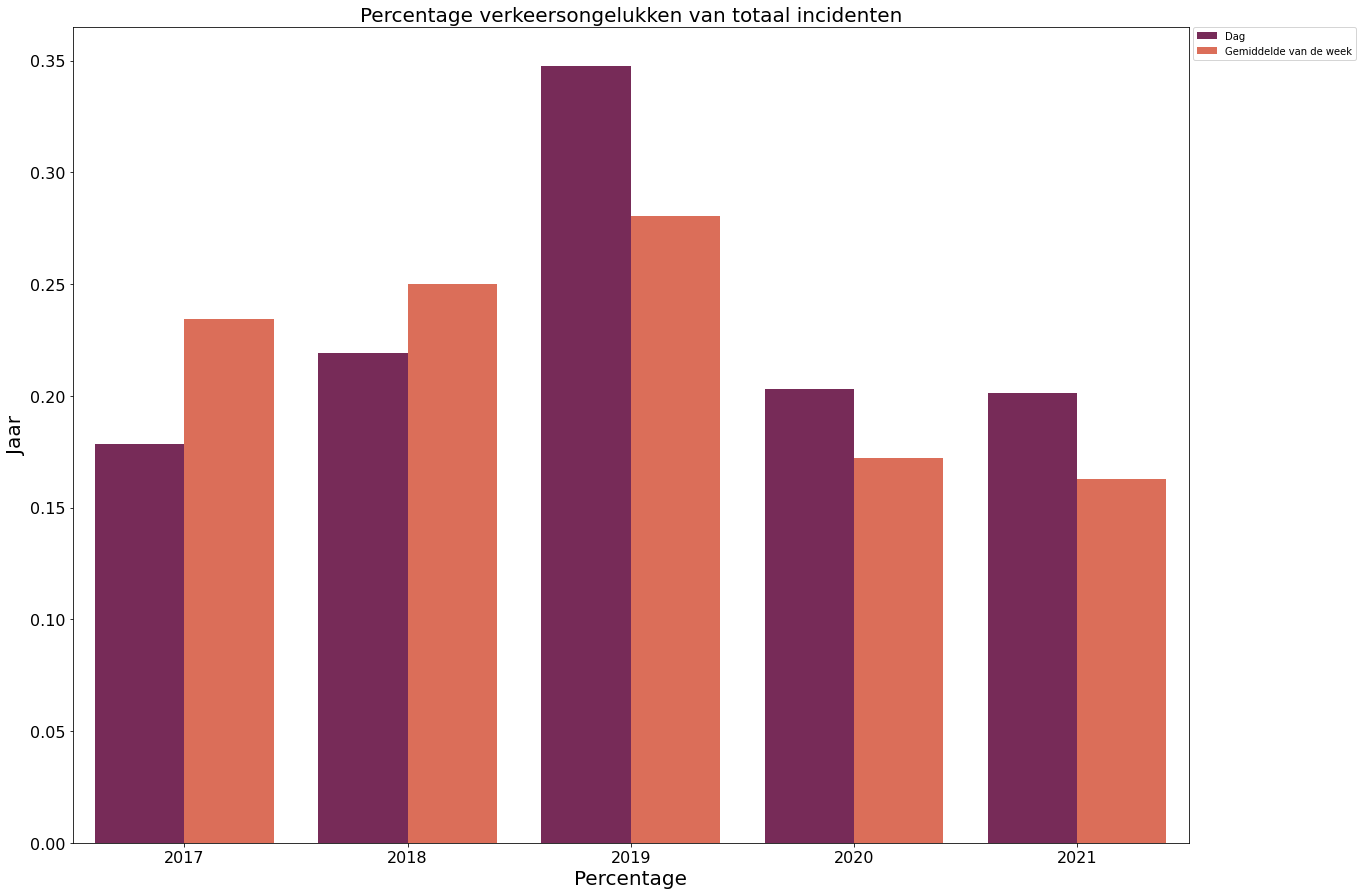

In [78]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(
    ax=ax,
    data=total,
    x="YEAR_x",
    y="Percentage",
    hue="TYPE",
    palette="rocket",
)
ax.set(xlabel="Jaar", ylabel="Aantal")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Percentage verkeersongelukken van totaal incidenten", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Percentage", fontsize=20)
plt.ylabel("Jaar", fontsize=20)

plt.legend(bbox_to_anchor=(1.15, 1), loc="upper right", borderaxespad=0)
plt.show()

***
# Job story 2: Hit and run

### Business understanding
De politiechef heeft ons gevraagd om te kijken of er een grote stijging is met de aantal hit & run incidenten.

### Data preperation
Hiervoor gebruiken wij de crime_df dataset.

### Select data
Om te kunnen modelleren, hebben we een aantal gegevens nodig. Namelijk:

Alle incidenten met de misdaad type traffic-accident-hit-and-run

In [79]:
# Om onafhankelijk aanpassingen te maken zijn nieuwe variabelen handig, vandaar een copy en een tag j1 (job story 1) aan het begin van het variabel
j1_crime_df = crime_df.copy()

In [80]:
# Tel alle incidenten op per datum van de Memorial days. Daarna voeg je de jaar toe als een kolom samen met de type.
j1_allhitandruns = j1_crime_df[j1_crime_df["OFFENSE_TYPE_ID"] == "traffic-accident-hit-and-run"]

j1_grouped = j1_allhitandruns.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_grouped.columns = ["Datum", "Aantal incidenten"]

j1_grouped

,Datum,Aantal incidenten
0,2017-01-02,9
1,2017-01-03,15
2,2017-01-04,14
3,2017-01-05,16
4,2017-01-06,25
...,...,...
1879,2022-02-24,24
1880,2022-02-25,19
1881,2022-02-26,14
1882,2022-02-27,20


### Modeling

Om de geprepareerde data in kaart te brengen is een barplot gebruikt om de aantallen te visualiseren.

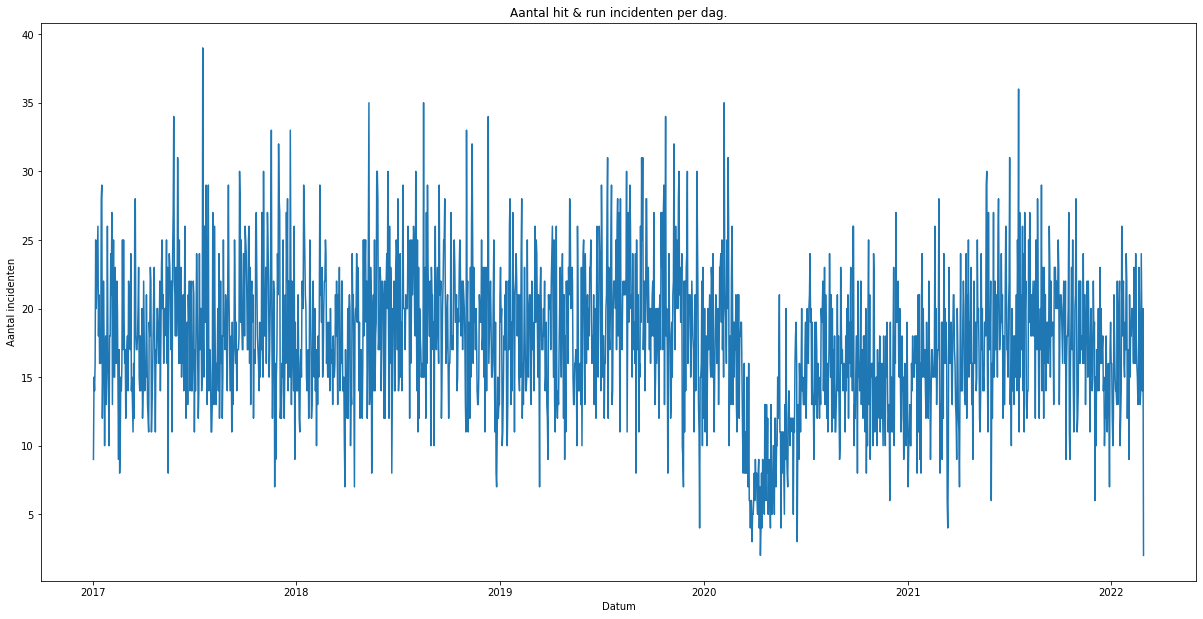

In [81]:
a4_dims = (20.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=j1_grouped, x="Datum", y="Aantal incidenten", palette="rocket").set(title='Aantal hit & run incidenten per dag.')
plt.show()

Gezien aan de plot hierboven, zie je dat er tussen 2020 en 2021 erg weinig hit & runs zijn geweest vergeleken met de rest. Laten we daar dieper op in gaan

In [82]:
mask = (j1_grouped['Datum'] > '2020-1-1') & (j1_grouped['Datum'] <= '2021-1-1')

j1_zoomed = j1_grouped.loc[mask]

j1_zoomed

,Datum,Aantal incidenten
1095,2020-01-02,12
1096,2020-01-03,20
1097,2020-01-04,11
1098,2020-01-05,15
1099,2020-01-06,18
...,...,...
1456,2020-12-28,13
1457,2020-12-29,10
1458,2020-12-30,11
1459,2020-12-31,19


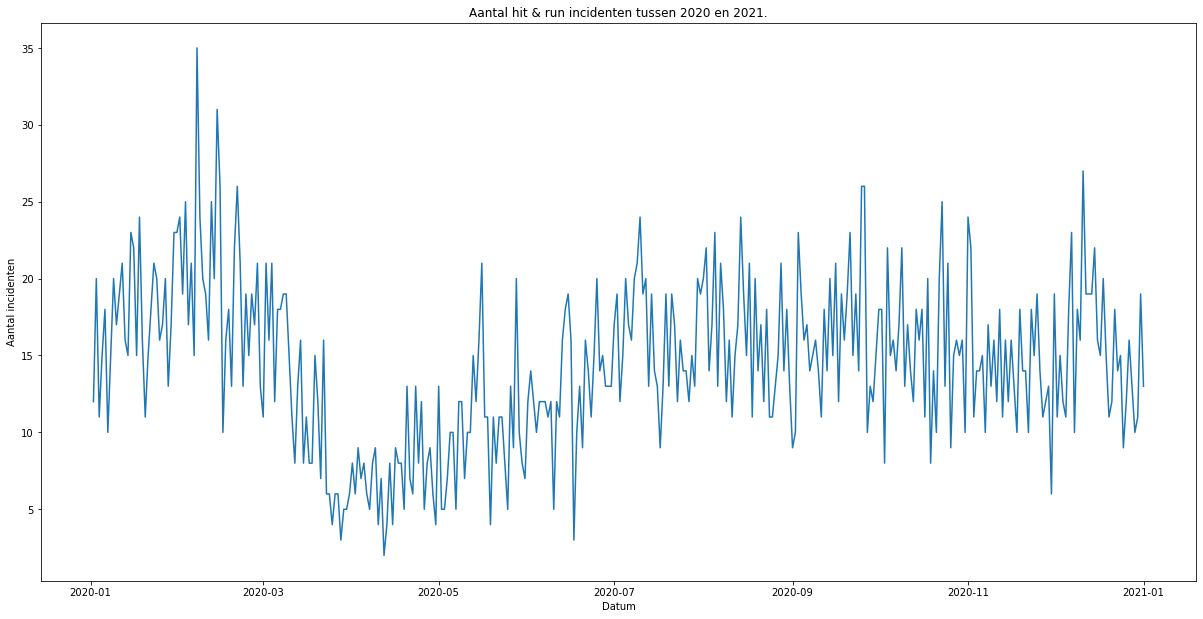

In [83]:
a4_dims = (20.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=j1_zoomed, x="Datum", y="Aantal incidenten", palette="rocket").set(title='Aantal hit & run incidenten tussen 2020 en 2021.')
plt.show()

Gezien naar de plot hierboven is er inderdaad tussen Maart en Juli een stuk minder is. Laten we kijken of dit ook zo is met normale verkeers incidenten en auto diefstal.

In [84]:
# Tel alle incidenten op per datum van de Memorial days. Daarna voeg je de jaar toe als een kolom samen met de type.
j1_categorized = j1_crime_df[j1_crime_df["OFFENSE_TYPE_ID"].isin(["traffic-accident", "traffic-accident-hit-and-run", "theft-items-from-vehicle", "theft-parts-from-vehicle"])]
j1_categorized = j1_categorized.groupby(["OFFENSE_TYPE_ID", "REPORTED_DATE_NORMALIZED"], as_index=False).size()

mask = (j1_categorized['REPORTED_DATE_NORMALIZED'] > '2020-1-1') & (j1_categorized['REPORTED_DATE_NORMALIZED'] <= '2021-1-1')

j1_cat_zoomed = j1_categorized.loc[mask]

j1_cat_zoomed.columns = ["Categorie", "Datum", "Aantal incidenten"]
j1_cat_zoomed

,Categorie,Datum,Aantal incidenten
1095,theft-items-from-vehicle,2020-01-02,17
1096,theft-items-from-vehicle,2020-01-03,17
1097,theft-items-from-vehicle,2020-01-04,12
1098,theft-items-from-vehicle,2020-01-05,15
1099,theft-items-from-vehicle,2020-01-06,14
...,...,...,...
7099,traffic-accident-hit-and-run,2020-12-28,13
7100,traffic-accident-hit-and-run,2020-12-29,10
7101,traffic-accident-hit-and-run,2020-12-30,11
7102,traffic-accident-hit-and-run,2020-12-31,19


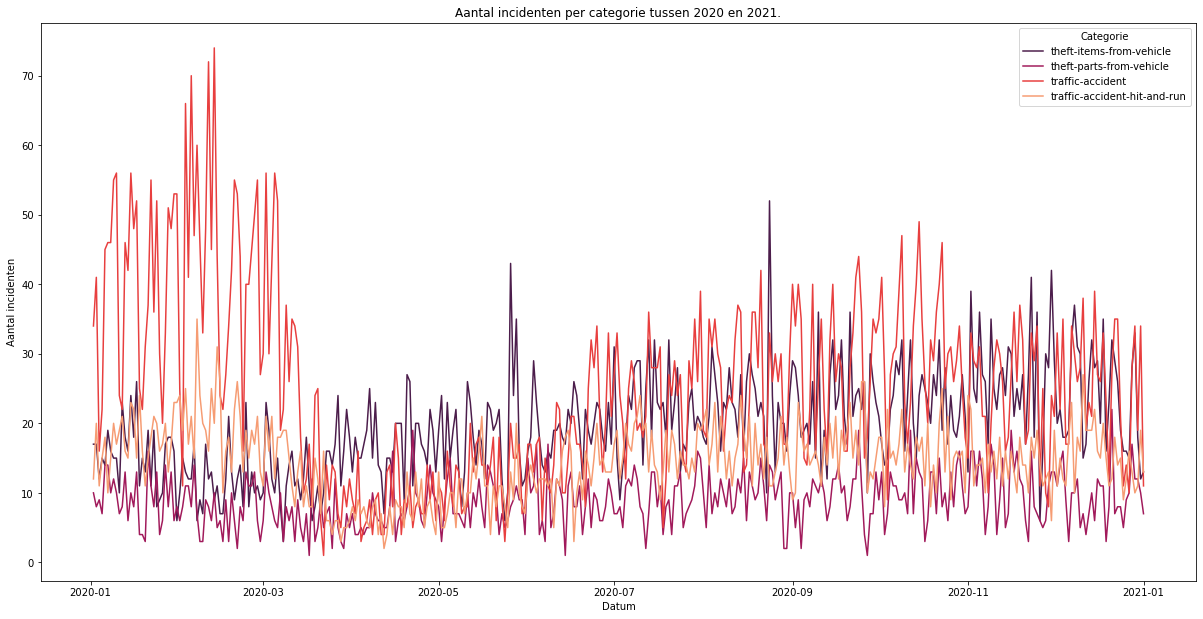

In [85]:
a4_dims = (20.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=j1_cat_zoomed, x="Datum", y="Aantal incidenten", hue="Categorie", palette="rocket").set(title='Aantal incidenten per categorie tussen 2020 en 2021.')
plt.show()

Bovenstaand zien wij een soortgelijke verlaging als bij de hit & run bij alle categoriën.

Na wat zoeken kwam ik er achter dat op 19 maart 2020 1 van de grootste sneeuwstormen was in Denver in 4 jaar. Op dit moment begon ook de Corona resticties te gelden die Denver had opgesteld.

Door deze 2 factoren zijn er minder mensen buiten geweest met de auto. Daarbij zijn ook de auto diefstallen minder geworden, voornamelijk het stelen van auto onderdelen.

***
# Job story 3: COVID verschillen

### Business understanding
Als politiechef wil ik de impact en het herstel van de coronapandemie in kaart hebben, zodat ik kan anticiperen op mogelijke veranderingen

#### Business objectives
De politiechef wilt de impact van COVID en het herstel daarvan in kaart hebben.
- Een grafiek met gegevens van type criminaliteit voor covid en na covid

### Data understanding
Zie globale data understanding

### Data preparation

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

j6_crime_df = crime_df.copy()

# Adds a normalized reported date, the reported date gets converted to a date only, to be able to merge the mondays
j6_crime_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(crime_df["REPORTED_DATE"]).dt.normalize()
j6_crime_df["YEAR"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.isocalendar().year
j6_crime_df["MONTH"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.month
j6_crime_df["WEEK"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.isocalendar().week
j6_crime_df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR,MONTH,WEEK
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 12:00:00,2022-01-04 20:36:00,128 S CANOSA CT,...,39.714268,4.0,411.0,valverde,1,0,2022-01-04,2022,1,1
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 06:45:00,NaT,2022-01-03 11:01:00,650 15TH ST,...,39.743649,6.0,611.0,cbd,1,0,2022-01-03,2022,1,1
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 01:00:00,NaT,2022-01-03 06:11:00,919 E COLFAX AVE,...,39.740130,6.0,621.0,north-capitol-hill,1,0,2022-01-03,2022,1,1
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,NaT,2022-01-03 21:12:00,2345 W ALAMEDA AVE,...,39.711518,4.0,411.0,valverde,1,0,2022-01-03,2022,1,1
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 17:06:00,NaT,2022-01-03 20:31:00,7800 E SMITH RD,...,39.769688,5.0,512.0,central-park,1,0,2022-01-03,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470273,202297778,202297778260700,2607,0,fraud-by-telephone,white-collar-crime,2022-02-25 08:00:00,2022-02-25 17:00:00,2022-02-26 09:22:00,4850 S AMMONS ST,...,39.629311,4.0,423.0,marston,1,0,2022-02-26,2022,2,8
470274,202297851,202297851260700,2607,0,fraud-by-telephone,white-collar-crime,2022-01-27 09:00:00,NaT,2022-02-26 10:21:00,14151 E RANDOLPH PL,...,39.797813,5.0,521.0,montbello,1,0,2022-02-26,2022,2,8
470275,202296894,202296894260900,2609,0,fraud-by-use-of-computer,white-collar-crime,2022-02-24 12:00:00,NaT,2022-02-25 23:30:00,301 N JERSEY ST,...,39.721561,3.0,321.0,hilltop,1,0,2022-02-25,2022,2,8
470276,2022100071,2022100071269903,2699,3,theft-of-services,larceny,2022-02-27 12:00:00,NaT,2022-02-27 18:22:00,1605 N FEDERAL BLVD,...,39.742973,1.0,121.0,west-colfax,1,0,2022-02-27,2022,2,8


### Modelling

##### Heatmap misdaden 2017-2021
Hier onder is een heatmap te zien met alle misdaden per maand van het jaar 2017 tot 2021

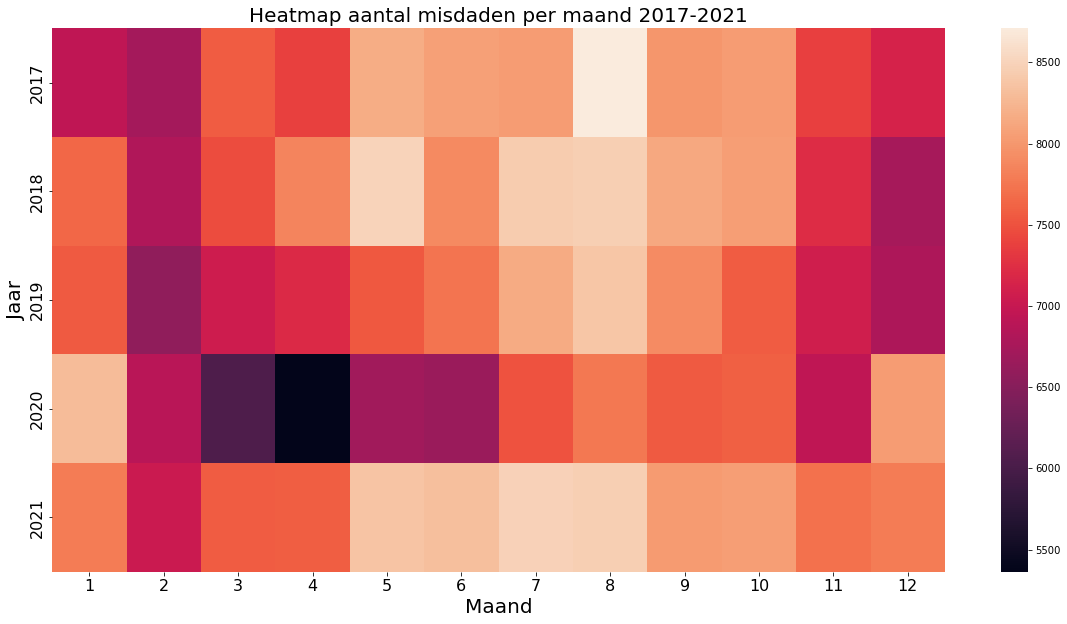

In [87]:
df_heat = j6_crime_df.copy()
df_total_peryear = df_heat.drop(df_heat[df_heat["YEAR"] == 2022].index)

plt.figure(figsize=(20, 10))

pivot = df_total_peryear.pivot_table(
    index="YEAR",
    columns="MONTH",
    values="REPORTED_DATE_NORMALIZED",
    aggfunc="size"
).fillna(0)
sns.heatmap(pivot)
plt.title("Heatmap aantal misdaden per maand 2017-2021", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Maand", fontsize=20)
plt.ylabel("Jaar", fontsize=20)
plt.show()

##### Verandering in misdaad 2017-2021
Hieronder worden de wisselingen in criminaliteit van 2017 tot 2021 in kaart gebracht aan de hand van een pointplot.

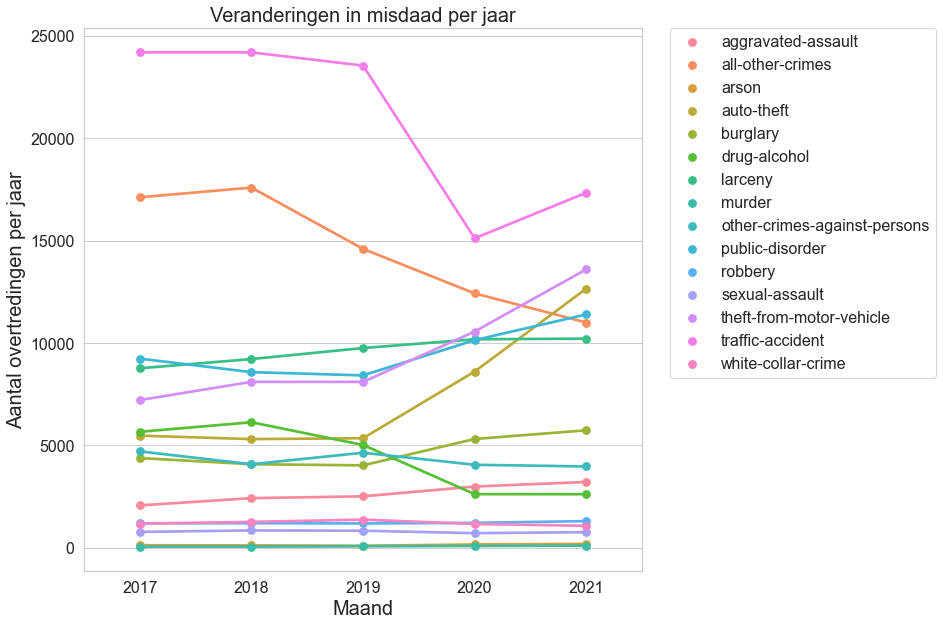

In [88]:
grouped = j6_crime_df.groupby(["OFFENSE_CATEGORY_ID", "YEAR"], as_index=False).size()
grouped_till22 = grouped.drop(grouped[grouped["YEAR"] == 2022].index)
grouped_till22.columns = ["Overtreding", "Jaar", "Gemiddeld aantal overtredingen"]
grouped_till22

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
sns.pointplot(data=grouped_till22, x="Jaar", y="Gemiddeld aantal overtredingen", hue="Overtreding", grid=True )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=16)
plt.title("Veranderingen in misdaad per jaar", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Maand", fontsize=20)
plt.ylabel("Aantal overtredingen per jaar", fontsize=20)
plt.show()

##### Verandering in misdaad 2019 ten opzichte van 2021
Hieronder worden de veranderingen in misdaad van 2019 ten opzichte van 2021 in kaart gebracht.

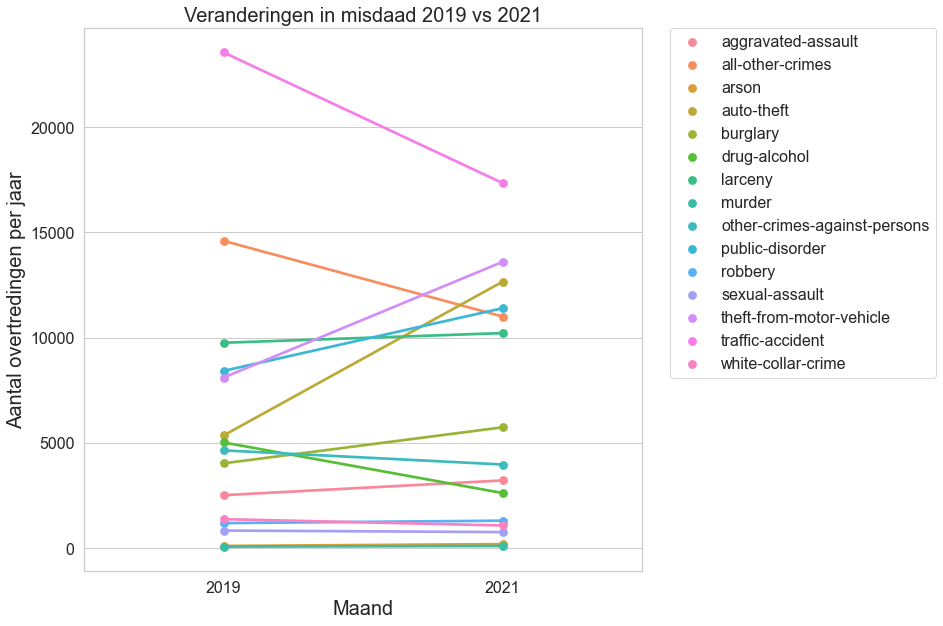

In [89]:
df_2019 = grouped_till22.loc[grouped_till22["Jaar"] == 2019]
df_2021 = grouped_till22.loc[grouped_till22["Jaar"] == 2021]
df_2019_2021 = df_2019.append(df_2021)

plt.figure(figsize=(10,10))
ax = sns.pointplot(data=df_2019_2021, x="Jaar", y="Gemiddeld aantal overtredingen", hue="Overtreding")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=16)
plt.title("Veranderingen in misdaad 2019 vs 2021", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Maand", fontsize=20)
plt.ylabel("Aantal overtredingen per jaar", fontsize=20)
plt.show()